# Olympic athletes

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#The-dataset" data-toc-modified-id="The-dataset-1">The dataset</a></span></li><li><span><a href="#How-many-medals-of-each-type-have-been-awarded?" data-toc-modified-id="How-many-medals-of-each-type-have-been-awarded?-2">How many medals of each type have been awarded?</a></span></li><li><span><a href="#Obtain-a-list-with-all-the-summer-olympics-locations-and-one-with-all-the-winter-olympics-locations." data-toc-modified-id="Obtain-a-list-with-all-the-summer-olympics-locations-and-one-with-all-the-winter-olympics-locations.-3">Obtain a list with all the summer olympics locations and one with all the winter olympics locations.</a></span></li><li><span><a href="#Extract-all-the-olympic-gold-medalists-of-the-sport-of-your-choice." data-toc-modified-id="Extract-all-the-olympic-gold-medalists-of-the-sport-of-your-choice.-4">Extract all the olympic gold medalists of the sport of your choice.</a></span></li><li><span><a href="#Find-out-who-is-the-athlete-with-the-highest-number-of-medals." data-toc-modified-id="Find-out-who-is-the-athlete-with-the-highest-number-of-medals.-5">Find out who is the athlete with the highest number of medals.</a></span></li><li><span><a href="#Find-out-about-further-athletes" data-toc-modified-id="Find-out-about-further-athletes-6">Find out about further athletes</a></span></li><li><span><a href="#Who-are-the-athletes-with-the-most-participations?" data-toc-modified-id="Who-are-the-athletes-with-the-most-participations?-7">Who are the athletes with the most participations?</a></span></li><li><span><a href="#Display-the-distribution-of-medals-per-country" data-toc-modified-id="Display-the-distribution-of-medals-per-country-8">Display the distribution of medals per country</a></span></li><li><span><a href="#Which-are-the-countries-with-the-highest-numbers-of-medals?" data-toc-modified-id="Which-are-the-countries-with-the-highest-numbers-of-medals?-9">Which are the countries with the highest numbers of medals?</a></span></li><li><span><a href="#Which-are-the-countries-with-the-highest-numbers-of-competition-participations?" data-toc-modified-id="Which-are-the-countries-with-the-highest-numbers-of-competition-participations?-10">Which are the countries with the highest numbers of competition participations?</a></span></li><li><span><a href="#Which-countries-have-the-highest-gold-medal-rate-out-of-all-participations?" data-toc-modified-id="Which-countries-have-the-highest-gold-medal-rate-out-of-all-participations?-11">Which countries have the highest gold medal rate out of all participations?</a></span></li><li><span><a href="#What-is-the-number-of-unique-athletes-per-country?" data-toc-modified-id="What-is-the-number-of-unique-athletes-per-country?-12">What is the number of unique athletes per country?</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## The dataset

The dataset [120 years of Olympic History](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results) contains data about all the participants in the olympics. Be aware that not all names may be accurately represented in that database.

In [2]:
df = pd.read_csv(
    '../../../dataset-collection/120-years-of-olympic-history-athletes-and-results/athlete_events.csv')

In [3]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
df.shape

(271116, 15)

## How many medals of each type have been awarded?

In [5]:
df.Medal.value_counts()

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

## Obtain a list with all the summer olympics locations and one with all the winter olympics locations.

In [6]:
summer_games = df[['Year', 'City']][df.Season == 'Summer'].drop_duplicates(
).set_index('Year').sort_values(by='Year')
summer_games

,City
Year,
1896,Athina
1900,Paris
1904,St. Louis
1906,Athina
1908,London
1912,Stockholm
1920,Antwerpen
1924,Paris
1928,Amsterdam


In [7]:
df[['Year', 'City']][df.Season == 'Winter'].drop_duplicates(
).set_index('Year').sort_values(by='Year')

,City
Year,
1924,Chamonix
1928,Sankt Moritz
1932,Lake Placid
1936,Garmisch-Partenkirchen
1948,Sankt Moritz
1952,Oslo
1956,Cortina d'Ampezzo
1960,Squaw Valley
1964,Innsbruck


## Extract all the olympic gold medalists of the sport of your choice.

- Group the results by Year, Event and Name.
- Which are the most successful athletes in that sport?

In [8]:
grouped = df[(df.Sport == 'Swimming') & (df.Medal == 'Gold')].groupby(
    ['Year', 'Event', 'Medal', 'Name'])[['Name']]
grouped.count()

Name
Year Event                                           Medal Name                                     
1896 Swimming Men's 1,200 metres Freestyle           Gold  Alfrd (Arnold-) Hajs (Guttmann-)        1
     Swimming Men's 100 metres Freestyle             Gold  Alfrd (Arnold-) Hajs (Guttmann-)        1
     Swimming Men's 100 metres Freestyle For Sailors Gold  Ioannis Malokinis                       1
     Swimming Men's 500 metres Freestyle             Gold  Paul Neumann (-Newman)                  1
1900 Swimming Men's 1,000 metres Freestyle           Gold  John Arthur Jarvis                      1
     Swimming Men's 200 metres Backstroke            Gold  Ernst Heinrich Hoppenberg               1
     Swimming Men's 200 metres Freestyle             Gold  Frederick Claude Vivian "Fred" Lane     1
     Swimming Men's 200 metres Obstacle Course       Gold  Frederick Claude Vivian "Fred" Lane     1
     Swimming Men's 200 metres Team Swimming         Gold  Ernst Heinrich Hoppenberg               1
                                                           Ernst Lhrsen                            1
                                                           Gustav Lexau                            1
                                                           Max Otto Hainle                         1
     Swimming Men's 4,000 metres Freestyle           Gold  John Arthur Jarvis                      1
     Swimming Men's Underwater Swimming              Gold  Charles Devendeville                    1
1904 Swimming Men's 100 Yard Backstroke              Gold  Walter Brack                            1
     Swimming Men's 100 yard Freestyle               Gold  Zoltn Imre dn von Halmay                1
     Swimming Men's 220 yard Freestyle               Gold  Charles Meldrum "Charlie" Daniels       1
     Swimming Men's 4 x 50 Yard Freestyle Relay      Gold  Charles Meldrum "Charlie" Daniels       1
                                                           Joseph Aloysius "Joe" Ruddy, Sr.        1
                                                           Leo Joseph "Budd" Goodwin               1
                                                           Louis de Breda "Lou" Handley            1
     Swimming Men's 440 Yard Breaststroke            Gold  Georg Zacharias                         1
     Swimming Men's 440 yard Freestyle               Gold  Charles Meldrum "Charlie" Daniels       1
     Swimming Men's 50 yard Freestyle                Gold  Zoltn Imre dn von Halmay                1
     Swimming Men's 880 yard Freestyle               Gold  Emil A. Rausch                          1
     Swimming Men's One Mile Freestyle               Gold  Emil A. Rausch                          1
     Swimming Men's Plunge For Distance              Gold  William Eugene "Billy" Dickey           1
1906 Swimming Men's 100 metres Freestyle             Gold  Charles Meldrum "Charlie" Daniels       1
     Swimming Men's 4 x 250 metres Freestyle Relay   Gold  Gza Kiss (Drippei-, -Klein)             1
                                                           Henrik Hajs (Guttmann-)                 1
...                                                                                              ...
2016 Swimming Women's 100 metres Freestyle           Gold  Simone Ashley Manuel                    1
     Swimming Women's 200 metres Backstroke          Gold  Madeline Jane "Maya" DiRado             1
     Swimming Women's 200 metres Breaststroke        Gold  Rie Kaneto                              1
     Swimming Women's 200 metres Butterfly           Gold  Mireia Belmonte Garca                   1
     Swimming Women's 200 metres Freestyle           Gold  Kathleen Genevieve "Katie" Ledecky      1
     Swimming Women's 200 metres Individual Medley   Gold  Katinka Hossz                           1
     Swimming Women's 4 x 100 metres Freestyle Relay Gold  Brittany Joyce Elmslie                  1
                                                        

In [9]:
best_athletes_swimming = pd.Series(
    grouped.count().index.get_level_values(3)).value_counts()
best_athletes_swimming.head(20)

Michael Fred Phelps, II                            23
Mark Andrew Spitz                                   9
Matthew Nicholas "Matt" Biondi                      8
Jennifer Elisabeth "Jenny" Thompson (-Cumpelik)     8
Donald Arthur "Don" Schollander                     7
Amy Deloris Van Dyken (-Rouen)                      6
Ryan Steven Lochte                                  6
Kristin Otto                                        6
Gary Wayne Hall, Jr.                                5
Kathleen Genevieve "Katie" Ledecky                  5
Dana Whitney Vollmer (-Grant)                       5
Ian James Thorpe                                    5
Nathan Ghar-Jun Adrian                              5
Aaron Wells Peirsol                                 5
Krisztina Egerszegi                                 5
Charles Meldrum "Charlie" Daniels                   5
Stephen Edward "Steve" Clark                        5
Melissa Jeanette "Missy" Franklin                   5
Peter Johann "Johnny" Weissm

## Find out who is the athlete with the highest number of medals.  

Get the events where the athlete obtained a medal and how many medals of which type he won in each of these events.

In [10]:
df[df.Name.str.contains('Phelps') & df.Name.str.contains(
    'Michael')].groupby(['Event', 'Medal'])['Name'].count()

Event                                          Medal 
Swimming Men's 100 metres Butterfly            Gold      3
                                               Silver    1
Swimming Men's 200 metres Butterfly            Gold      3
                                               Silver    1
Swimming Men's 200 metres Freestyle            Bronze    1
                                               Gold      1
Swimming Men's 200 metres Individual Medley    Gold      4
Swimming Men's 4 x 100 metres Freestyle Relay  Bronze    1
                                               Gold      2
                                               Silver    1
Swimming Men's 4 x 100 metres Medley Relay     Gold      4
Swimming Men's 4 x 200 metres Freestyle Relay  Gold      4
Swimming Men's 400 metres Individual Medley    Gold      2
Name: Name, dtype: int64

## Find out about further athletes

In [11]:
df[df.Name.str.contains('Michael') & df.Name.str.contains('Gro')]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
85043,43151,Michael Gro,M,20.0,201.0,88.0,West Germany,FRG,1984 Summer,1984,Summer,Los Angeles,Swimming,Swimming Men's 200 metres Freestyle,Gold
85044,43151,Michael Gro,M,20.0,201.0,88.0,West Germany,FRG,1984 Summer,1984,Summer,Los Angeles,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,NaN
85045,43151,Michael Gro,M,20.0,201.0,88.0,West Germany,FRG,1984 Summer,1984,Summer,Los Angeles,Swimming,Swimming Men's 4 x 200 metres Freestyle Relay,Silver
85046,43151,Michael Gro,M,20.0,201.0,88.0,West Germany,FRG,1984 Summer,1984,Summer,Los Angeles,Swimming,Swimming Men's 100 metres Butterfly,Gold
85047,43151,Michael Gro,M,20.0,201.0,88.0,West Germany,FRG,1984 Summer,1984,Summer,Los Angeles,Swimming,Swimming Men's 200 metres Butterfly,Silver
85048,43151,Michael Gro,M,20.0,201.0,88.0,West Germany,FRG,1984 Summer,1984,Summer,Los Angeles,Swimming,Swimming Men's 4 x 100 metres Medley Relay,NaN
85049,43151,Michael Gro,M,24.0,201.0,88.0,West Germany,FRG,1988 Summer,1988,Summer,Seoul,Swimming,Swimming Men's 200 metres Freestyle,NaN
85050,43151,Michael Gro,M,24.0,201.0,88.0,West Germany,FRG,1988 Summer,1988,Summer,Seoul,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,NaN
85051,43151,Michael Gro,M,24.0,201.0,88.0,West Germany,FRG,1988 Summer,1988,Summer,Seoul,Swimming,Swimming Men's 4 x 200 metres Freestyle Relay,Bronze
85052,43151,Michael Gro,M,24.0,201.0,88.0,West Germany,FRG,1988 Summer,1988,Summer,Seoul,Swimming,Swimming Men's 100 metres Butterfly,NaN


In [12]:
df[df.Name.str.contains('Usain') & df.Name.str.contains('Bolt')]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
24876,13029,Usain St. Leo Bolt,M,17.0,196.0,95.0,Jamaica,JAM,2004 Summer,2004,Summer,Athina,Athletics,Athletics Men's 200 metres,NaN
24877,13029,Usain St. Leo Bolt,M,21.0,196.0,95.0,Jamaica,JAM,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Men's 100 metres,Gold
24878,13029,Usain St. Leo Bolt,M,21.0,196.0,95.0,Jamaica,JAM,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Men's 200 metres,Gold
24879,13029,Usain St. Leo Bolt,M,21.0,196.0,95.0,Jamaica,JAM,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Men's 4 x 100 metres Relay,NaN
24880,13029,Usain St. Leo Bolt,M,25.0,196.0,95.0,Jamaica,JAM,2012 Summer,2012,Summer,London,Athletics,Athletics Men's 100 metres,Gold
24881,13029,Usain St. Leo Bolt,M,25.0,196.0,95.0,Jamaica,JAM,2012 Summer,2012,Summer,London,Athletics,Athletics Men's 200 metres,Gold
24882,13029,Usain St. Leo Bolt,M,25.0,196.0,95.0,Jamaica,JAM,2012 Summer,2012,Summer,London,Athletics,Athletics Men's 4 x 100 metres Relay,Gold
24883,13029,Usain St. Leo Bolt,M,29.0,196.0,95.0,Jamaica,JAM,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 100 metres,Gold
24884,13029,Usain St. Leo Bolt,M,29.0,196.0,95.0,Jamaica,JAM,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 200 metres,Gold
24885,13029,Usain St. Leo Bolt,M,29.0,196.0,95.0,Jamaica,JAM,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 4 x 100 metres Relay,Gold


## Who are the athletes with the most participations?

- Counted by events (in which events did they participate?)
- By number of games

In [13]:
grouped = df.groupby('Name')[['Event']].count()
grouped[grouped.Event > 5].sort_values(by='Event', ascending=False)

,Event
Name,
Robert Tait McKenzie,58
Heikki Ilmari Savolainen,39
"Joseph ""Josy"" Stoffel",38
Ioannis Theofilakis,36
Takashi Ono,33
Alexandros Theofilakis,32
Alfrd (Arnold-) Hajs (Guttmann-),32
Jean Lucien Nicolas Jacoby,32
Andreas Wecker,32


In [14]:
df[df.Name == 'Robert Tait McKenzie'][['Year', 'Event', 'Medal']]

,Year,Event,Medal
154798,1912,Art Competitions Mixed Sculpturing,NaN
154799,1928,"Art Competitions Mixed Sculpturing, Statues",NaN
154800,1928,"Art Competitions Mixed Sculpturing, Statues",NaN
154801,1928,"Art Competitions Mixed Sculpturing, Statues",NaN
154802,1928,"Art Competitions Mixed Sculpturing, Statues",NaN
154803,1928,"Art Competitions Mixed Sculpturing, Statues",NaN
154804,1928,"Art Competitions Mixed Sculpturing, Statues",NaN
154805,1928,"Art Competitions Mixed Sculpturing, Statues",NaN
154806,1932,"Art Competitions Mixed Sculpturing, Medals And...",Bronze
154807,1932,"Art Competitions Mixed Sculpturing, Unknown Event",NaN


In [15]:
df[df.Name == 'Andreas Wecker'][['Year', 'Event', 'Medal']]

,Year,Event,Medal
257974,1988,Gymnastics Men's Individual All-Around,NaN
257975,1988,Gymnastics Men's Team All-Around,Silver
257976,1988,Gymnastics Men's Floor Exercise,NaN
257977,1988,Gymnastics Men's Horse Vault,NaN
257978,1988,Gymnastics Men's Parallel Bars,NaN
257979,1988,Gymnastics Men's Horizontal Bar,NaN
257980,1988,Gymnastics Men's Rings,NaN
257981,1988,Gymnastics Men's Pommelled Horse,NaN
257982,1992,Gymnastics Men's Individual All-Around,NaN
257983,1992,Gymnastics Men's Team All-Around,NaN


In [16]:
df[df.Name == 'Aleksandr Vladimirovich Popov'][['Year', 'Event', 'Medal']]

,Year,Event,Medal
191528,1988,Biathlon Men's 20 kilometres,NaN
191529,1988,Biathlon Men's 4 x 7.5 kilometres Relay,Gold
191530,1992,Biathlon Men's 10 kilometres Sprint,NaN
191531,1992,Biathlon Men's 20 kilometres,NaN
191532,1992,Biathlon Men's 4 x 7.5 kilometres Relay,Silver
191533,1994,Biathlon Men's 10 kilometres Sprint,NaN
191534,1994,Biathlon Men's 20 kilometres,NaN
191535,1994,Biathlon Men's 4 x 7.5 kilometres Relay,NaN
191536,1998,Biathlon Men's 10 kilometres Sprint,NaN
191537,1998,Biathlon Men's 20 kilometres,NaN


In [17]:
df.groupby(['Name', 'Year'])[['Name']].count().head(10)

Name
Name                                      Year      
  Gabrielle Marie "Gabby" Adcock (White-) 2016     1
 Eleonora Margarida Josephina Scmitt      1948     2
 Jean Hauptmanns                          1912     1
 Luis ngel Fernando de los Santos Grossi  1948     1
                                          1952     4
 Th Anh                                   2016     1
 Th Ngn Thng                              2008     5
                                          2012     2
 Tin Tun                                  1988     1
A Dijiang                                 1992     1

In [18]:
most_games = df.groupby(['Name', 'Year'])[['Name']].count(
).groupby(level='Name')['Name'].count().sort_values(ascending=False)
most_games.head(10)

Name
Ian Millar                         10
Afanasijs Kuzmins                   9
Hubert Raudaschl                    9
Paul Bert Elvstrm                   8
Raimondo D'Inzeo                    8
Josefa Idem-Guerrini                8
Piero D'Inzeo                       8
Rajmond Debevec                     8
Durward Randolph Knowles            8
Nino Salukvadze (-Machavariani)     8
Name: Name, dtype: int64

In [19]:
df[df.Name == most_games.index[0]][['Name', 'NOC', 'Year', 'Sport', 'Medal']]

,Name,NOC,Year,Sport,Medal
159081,Ian Millar,CAN,1972,Equestrianism,NaN
159082,Ian Millar,CAN,1976,Equestrianism,NaN
159083,Ian Millar,CAN,1984,Equestrianism,NaN
159084,Ian Millar,CAN,1984,Equestrianism,NaN
159085,Ian Millar,CAN,1988,Equestrianism,NaN
159086,Ian Millar,CAN,1988,Equestrianism,NaN
159087,Ian Millar,CAN,1992,Equestrianism,NaN
159088,Ian Millar,CAN,1992,Equestrianism,NaN
159089,Ian Millar,CAN,1996,Equestrianism,NaN
159090,Ian Millar,CAN,1996,Equestrianism,NaN


## Display the distribution of medals per country

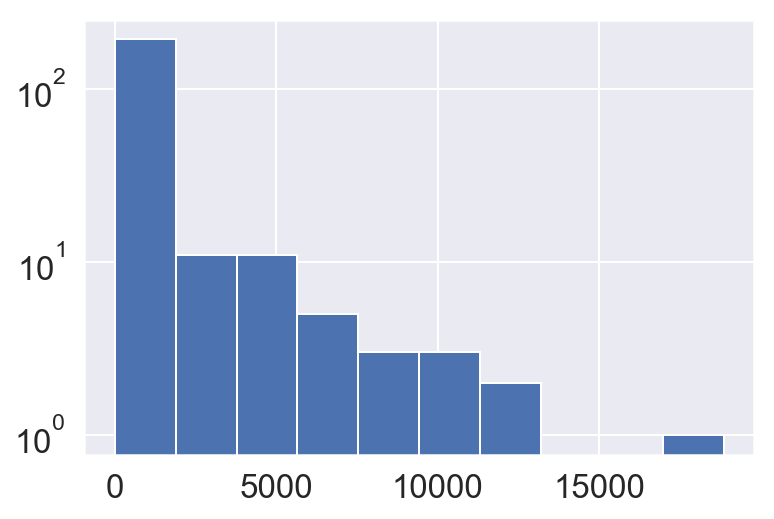

In [20]:
df.groupby('NOC')['Name'].count().sort_values(ascending=False).hist()
plt.yscale('log')

## Which are the countries with the highest numbers of medals?

In [21]:
df[df.Medal == 'Gold'].groupby(
    'NOC')['Name'].count().sort_values(ascending=False)[:20]

NOC
USA    2638
URS    1082
GER     745
GBR     678
ITA     575
FRA     501
SWE     479
CAN     463
HUN     432
GDR     397
RUS     390
NOR     378
CHN     350
AUS     348
NED     287
JPN     247
KOR     221
FIN     198
DEN     179
SUI     175
Name: Name, dtype: int64

In [22]:
df[df.Medal.notnull()].groupby(
    'NOC')['Name'].count().sort_values(ascending=False)[:10]

NOC
USA    5637
URS    2503
GER    2165
GBR    2068
FRA    1777
ITA    1637
SWE    1536
CAN    1352
AUS    1320
RUS    1165
Name: Name, dtype: int64

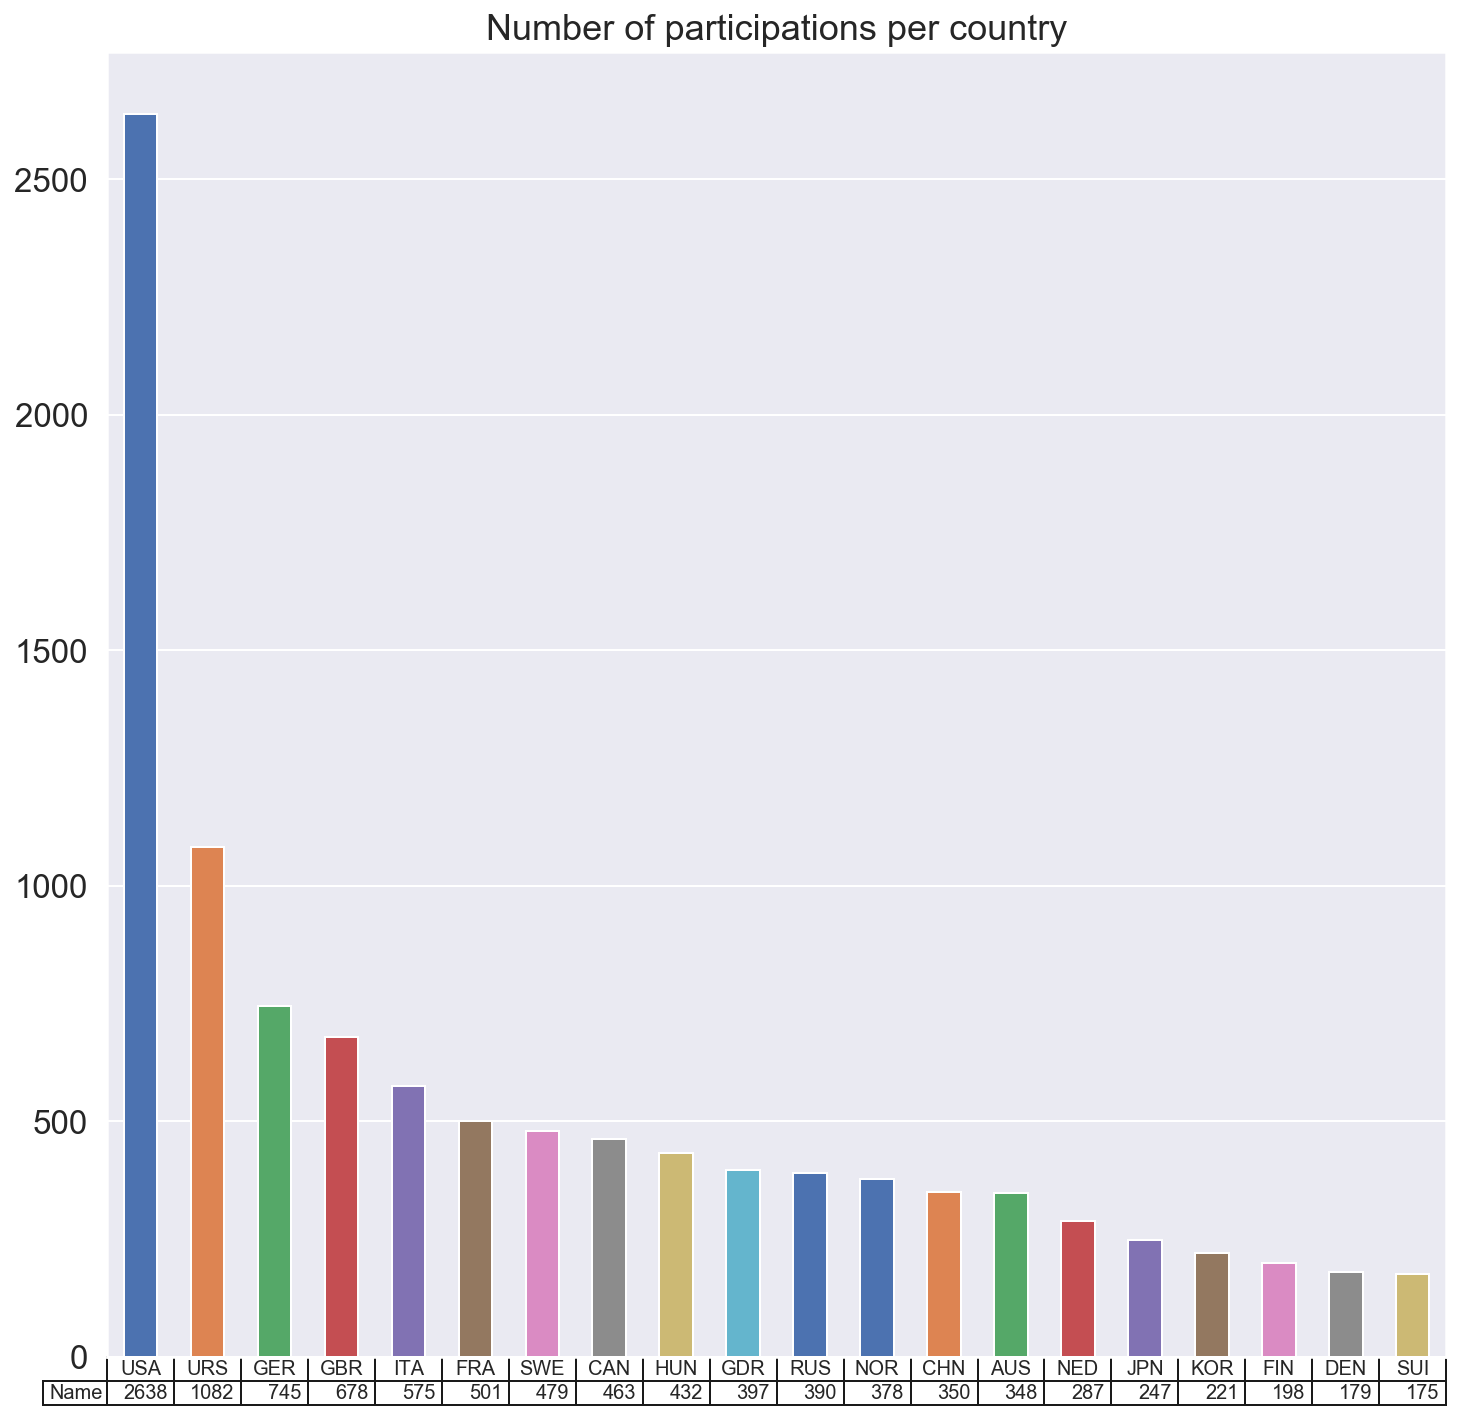

In [23]:
df[df.Medal == 'Gold'].groupby(
    'NOC')['Name'].count().sort_values(ascending=False)[:20].plot(kind='bar',figsize=(12,12),
            table=True,title='Number of participations per country')
plt.xticks([])
plt.xlabel(None);

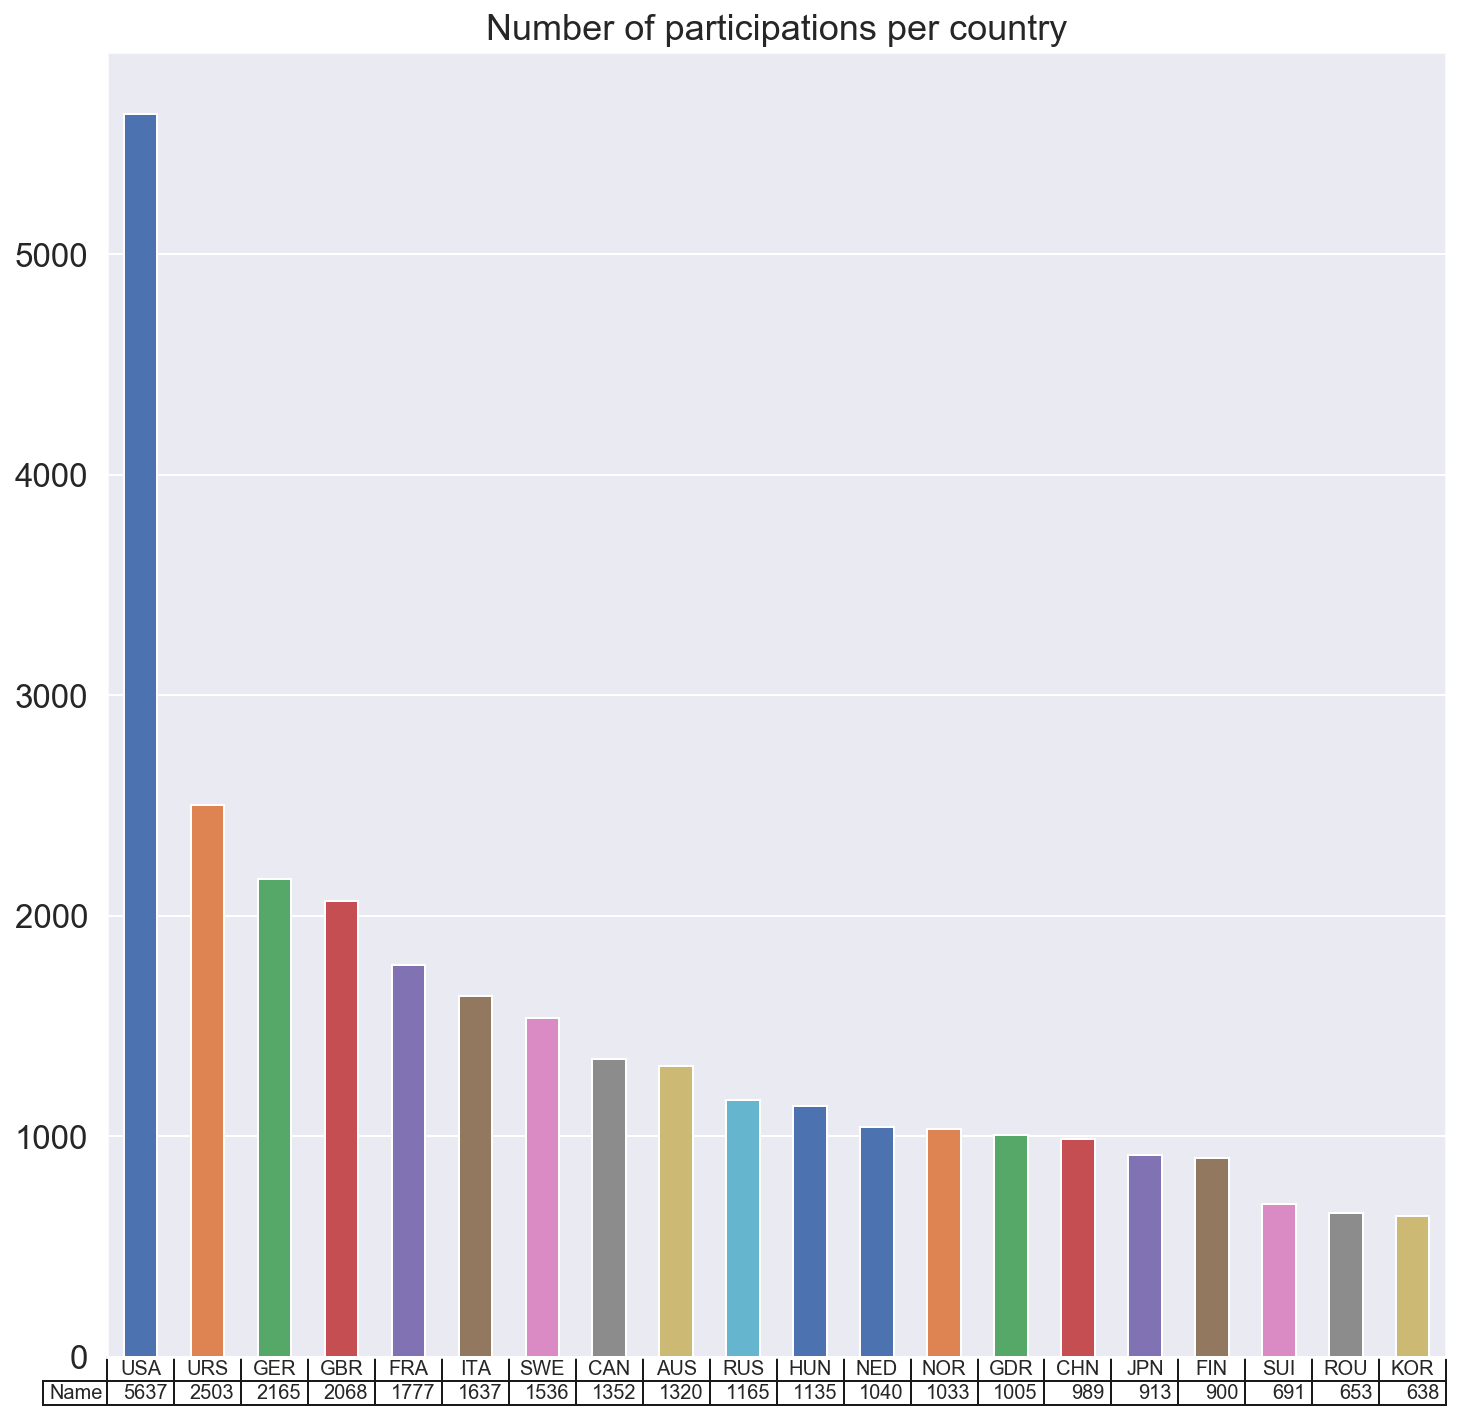

In [24]:
df[df.Medal.notnull()].groupby(
    'NOC')['Name'].count().sort_values(ascending=False)[:20].plot(kind='bar',figsize=(12,12),
            table=True,title='Number of participations per country')
plt.xticks([])
plt.xlabel(None);

## Which are the countries with the highest numbers of competition participations?

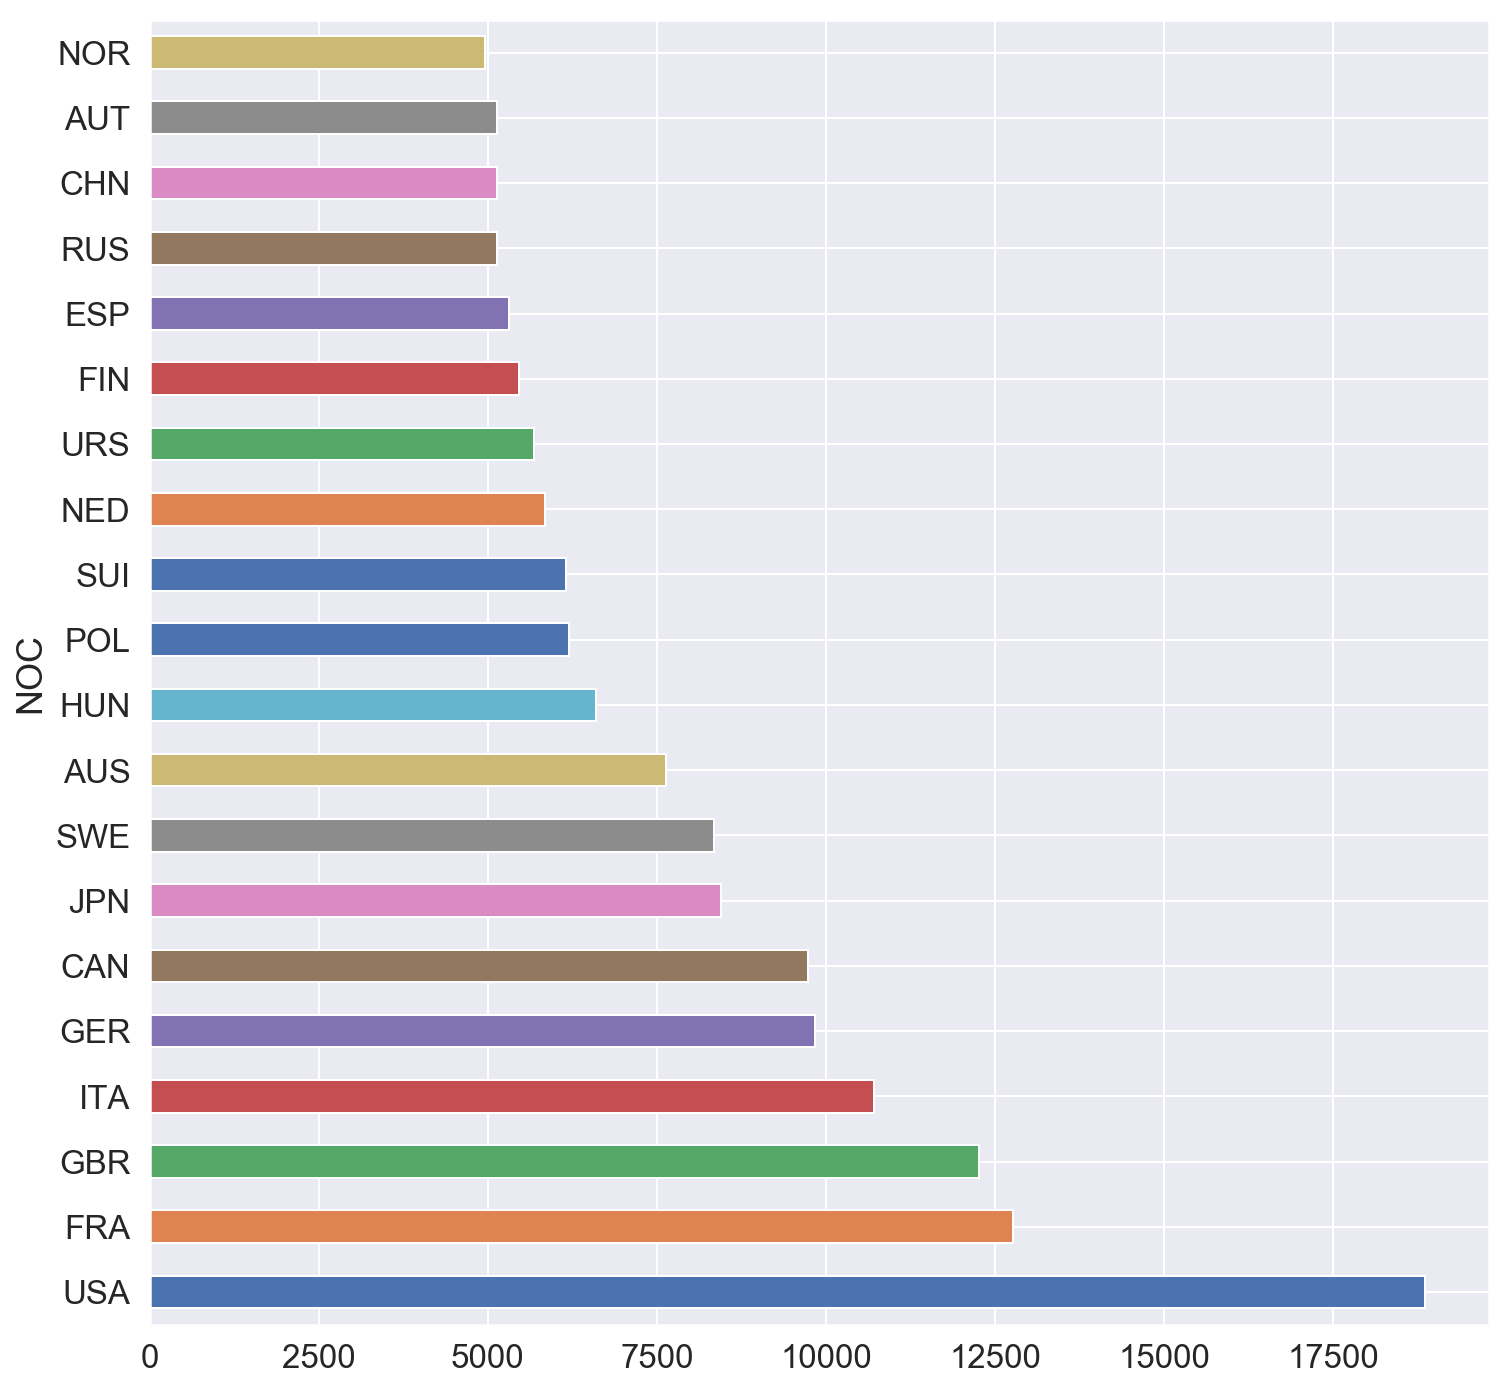

In [26]:
df.groupby(
    'NOC')['Name'].count().sort_values(ascending=False)[:20].plot(kind='barh',figsize=(12,12));

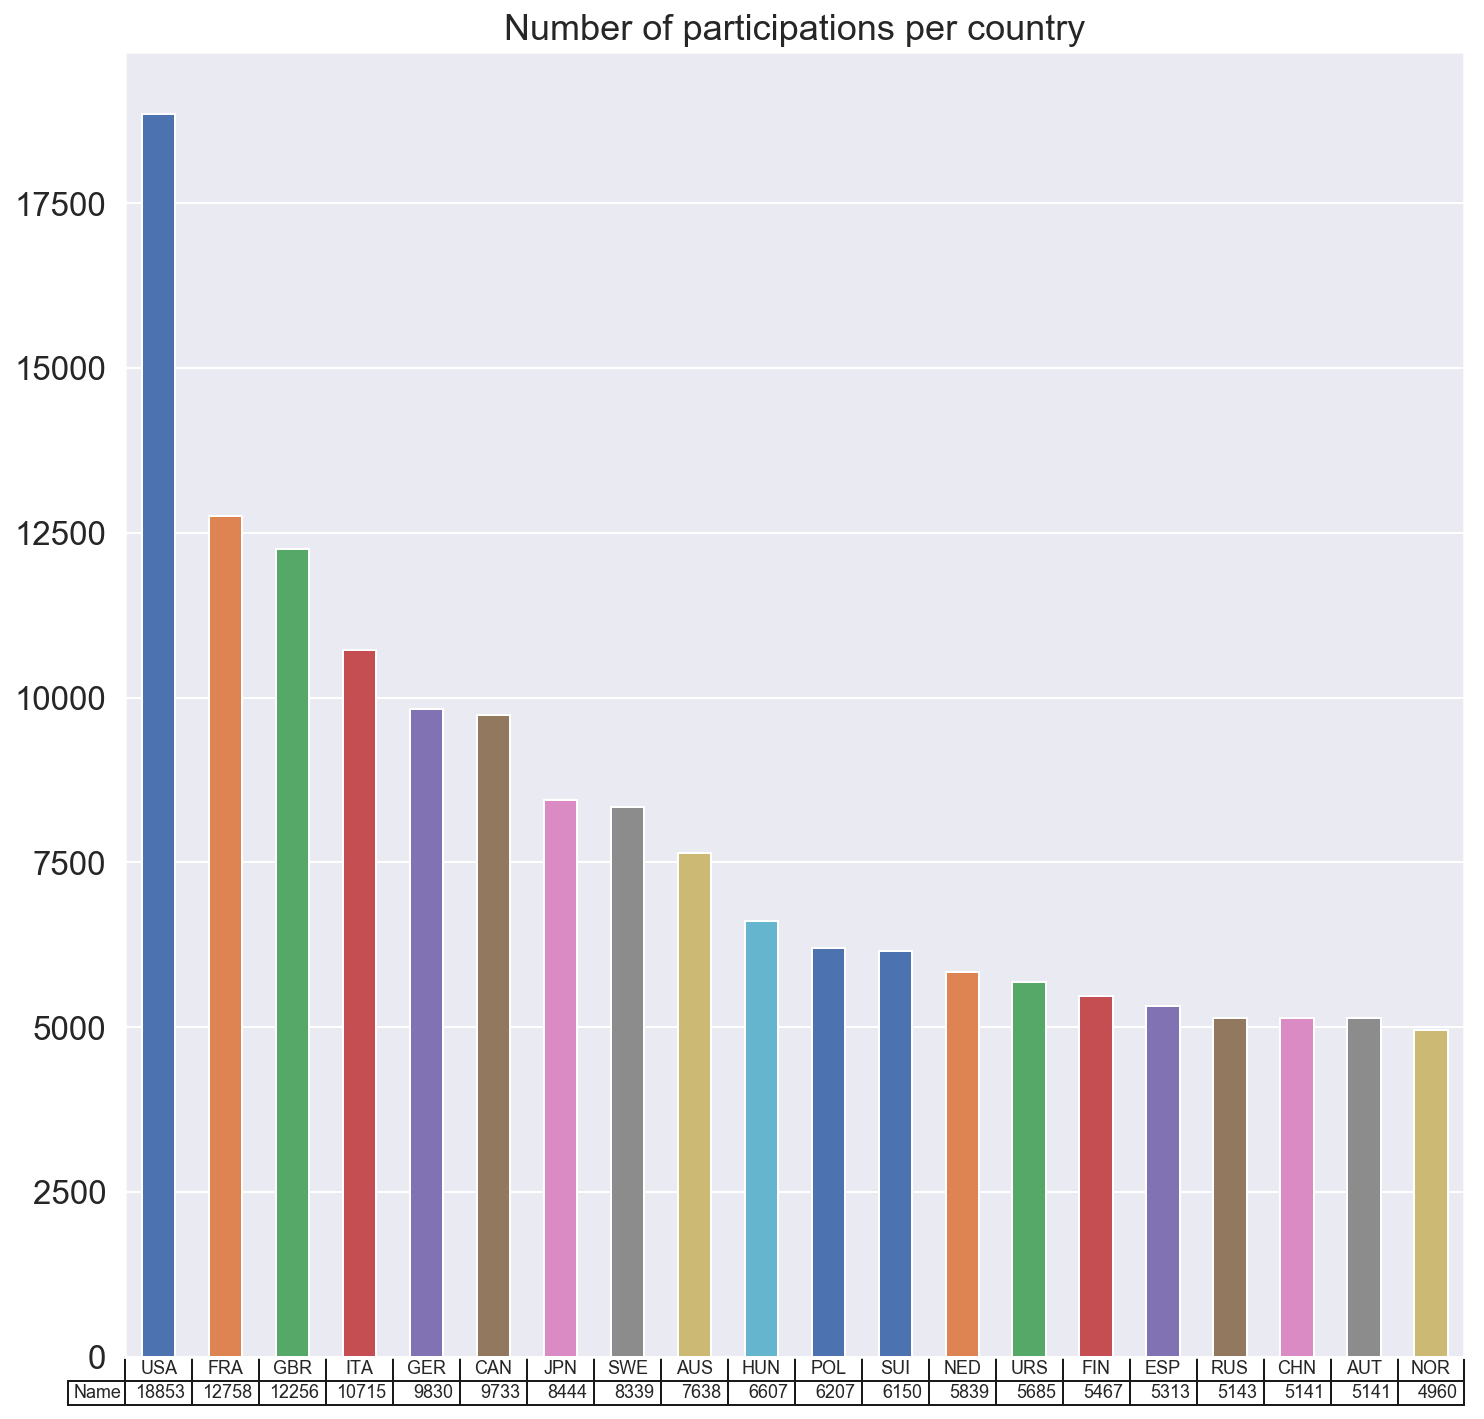

In [27]:
df.groupby(
    'NOC')['Name'].count().sort_values(ascending=False)[:20].plot(kind='bar',figsize=(12,12),
            table=True,title='Number of participations per country')
plt.xticks([])
plt.xlabel(None);

## Which countries have the highest gold medal rate out of all participations?

In [28]:
df[df.Medal == 'Gold'].groupby(
    'NOC')['Name'].count().divide(df.groupby(
    'NOC')['Name'].count()).sort_values(ascending=False)[:20]

NOC
ANZ    0.232558
URS    0.190325
GDR    0.150095
EUN    0.146991
USA    0.139925
KOS    0.125000
IND    0.098011
NOR    0.076210
RUS    0.075831
GER    0.075788
PAK    0.074733
CHN    0.068080
CRO    0.066210
CUB    0.066156
HUN    0.065385
CMR    0.064103
ETH    0.058201
SWE    0.057441
FIJ    0.056034
GBR    0.055320
Name: Name, dtype: float64

## What is the number of unique athletes per country?

In [29]:
df[df.NOC=='FRG']['Name'].unique().shape

(1703,)

In [30]:
grouped = df.groupby([
    'NOC'])[['Name']].nunique()
grouped.columns = ['count']
grouped.sort_values(by='count',ascending=False)[:20]

,count
NOC,
USA,9652
GBR,6273
FRA,6161
ITA,4921
GER,4860
CAN,4809
JPN,4036
AUS,3818
SWE,3782
